# Assignment 2: Regression Modeling & Prediction

## I. Data Preparation

In [96]:
# Import key library functions needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from error_metrics import print_regression_error_metrics
from sklearn import preprocessing

In [99]:
# Read in data
dfA = pd.read_csv('./Data/AmesHousingSetA.csv')
dfB = pd.read_csv('./Data/AmesHousingSetB.csv')
dfA.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
2,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
3,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
4,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500


At first glance we can see that several of these columns have NaN values. Such as 'Ally', 	'Pool.QC', 'Fence', and 'Misc.Feature'

In [100]:
#Look at what kind of data is in each column
dfA.dtypes

#Drop Columns that aren't significant
dfA = dfA.drop(labels= 'PID', axis=1)
dfB = dfB.drop(labels= 'PID', axis=1)
dfA = dfA.drop(labels= 'Utilities', axis=1)
dfB = dfB.drop(labels= 'Utilities', axis=1)

#Looking at the variables in each column with missing variables
dfA.isna().any()
dfA.columns[dfA.isna().any()].tolist()

['Lot.Frontage',
 'Alley',
 'Mas.Vnr.Type',
 'Mas.Vnr.Area',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.SF.1',
 'BsmtFin.Type.2',
 'BsmtFin.SF.2',
 'Bsmt.Unf.SF',
 'Total.Bsmt.SF',
 'Bsmt.Full.Bath',
 'Bsmt.Half.Bath',
 'Fireplace.Qu',
 'Garage.Type',
 'Garage.Yr.Blt',
 'Garage.Finish',
 'Garage.Cars',
 'Garage.Area',
 'Garage.Qual',
 'Garage.Cond',
 'Pool.QC',
 'Fence',
 'Misc.Feature']

In [101]:
#Look at the datatypes of the columns wih missing values
    # Replace missing objects with None and missing floats with 0
list(dfA[dfA.columns[dfA.isna().any()].tolist()])
for i in range(len(list(dfA[dfA.columns[dfA.isna().any()].tolist()]))):
    if dfA[list(dfA[dfA.columns[dfA.isna().any()].tolist()])[i]].dtypes == object:
        dfA[list(dfA[dfA.columns[dfA.isna().any()].tolist()])[i]] = dfA[list(dfA[dfA.columns[dfA.isna().any()].tolist()])[i]].replace(to_replace= 'NaN', value= 'None', inplace=True)
    elif dfA[list(dfA[dfA.columns[dfA.isna().any()].tolist()])[i]].dtypes == 'float64' or dfB[list(dfB[dfB.columns[dfB.isna().any()].tolist()])[i]].dtypes == 'int64':
        dfA[list(dfA[dfA.columns[dfA.isna().any()].tolist()])[i]] = dfA[list(dfA[dfA.columns[dfA.isna().any()].tolist()])[i]].replace(to_replace= 'NaN', value= 0, inplace=True)

#Look at the datatypes of the columns wih missing values
list(dfB[dfB.columns[dfB.isna().any()].tolist()])
for i in range(len(list(dfB[dfB.columns[dfB.isna().any()].tolist()]))):
    if dfB[list(dfB[dfB.columns[dfB.isna().any()].tolist()])[i]].dtypes == object:
        dfB[list(dfB[dfB.columns[dfB.isna().any()].tolist()])[i]] = dfB[list(dfB[dfB.columns[dfB.isna().any()].tolist()])[i]].replace(to_replace= 'NaN', value= 'None', inplace=True)
    elif dfB[list(dfB[dfB.columns[dfB.isna().any()].tolist()])[i]].dtypes == 'float64' or dfB[list(dfB[dfB.columns[dfB.isna().any()].tolist()])[i]].dtypes == 'int64':
        dfB[list(dfB[dfB.columns[dfB.isna().any()].tolist()])[i]] = dfB[list(dfB[dfB.columns[dfB.isna().any()].tolist()])[i]].replace(to_replace= 'NaN', value= 0, inplace=True)


#create a new dataframe with only numeric data
num_dfA = dfA._get_numeric_data()
nums_dfA = dfA.loc[:, dfA.dtypes == np.int64]

In [102]:
#Find out which features are categorical
def cat_features(dataframe):
    td = pd.DataFrame({'a':[1,2,3],'b':[1.0,2.0,3.0]})
    return filter(lambda x: not(dataframe[x].dtype in [td['a'].dtype, td['b'].dtype]), list(dataframe))


for i in range(len(list(cat_features(dfA)))):
    if list(cat_features(dfA))[i] not in list(cat_features(dfB)):
        print(list(cat_features(dfA))[i])
      #  print(dfA[list(cat_features(dfA))[i]].dtypes)

#One hot encode the categorical variables
dfC = pd.concat([dfA, dfB])
dfC = pd.get_dummies(dfC, columns= list(cat_features(dfC)))
dfA = dfC[:len(dfA)]
dfB = dfC[len(dfA):]

BsmtFin.SF.1
BsmtFin.SF.2
Bsmt.Unf.SF
Total.Bsmt.SF
Bsmt.Full.Bath
Bsmt.Half.Bath
Garage.Cars
Garage.Area


In [115]:
#print(dfB.dtypes.value_counts())
#print(dfA.dtypes.value_counts())
for i in range(len([x for x in list(cat_features(dfA)) if (x not in weird_columns)])):
    if [x for x in list(cat_features(dfA)) if (x not in weird_columns)][i] not in list(cat_features(dfB)):
       # print(list(cat_features(dfA))[i])
        #print(dfA[list(cat_features(dfA))[i]].dtypes)


#print(len([x for x in list(cat_features(dfA)) if (x not in weird_columns)]))
#print(len(list(cat_features(dfB))))

IndentationError: expected an indented block (<ipython-input-115-af0458d6340e>, line 13)

In [120]:
print(len(list(dfA)))
print(len(list(dfB)))

for i in range(len(list(dfA))):
    if list(dfA)[i] not in list(dfB):
       print(list(list(dfA)[i]))

'Exter.Qual_Ex' in list(dfB)

1692
1692


True

## I. Data Preparation Questions
_a) What specific data transforms did you perform prior to exploration and analysis, and why did you choose these?_

Prior to data exploration and analysis I found that the columns 'Ally', 'Pool.QC', 'Fence', and 'Misc.Feature' in both dataframes A and B has NaN values so I replaces the NaNs with None assuming that if the house didn't have any of these features listed specifically that they didn't have it. Additionally, I removed the 'PID' column because it would not help in predicting the price of a house. Through further investigation of the data I also found that the 'Utilities' column because there is only 3 houses with different options so I removed that variable. I also created a seperate dataframe with only the numeric data. I wanted to see how a regression would perform with only the numeric data columns before changing the string columns. Then in order to make sure that datafames A and B were the same size I combined the two dataframes before one-hot encoded the categorical variables then I split the dataframes back into A and B

## II. Exploratory Analysis

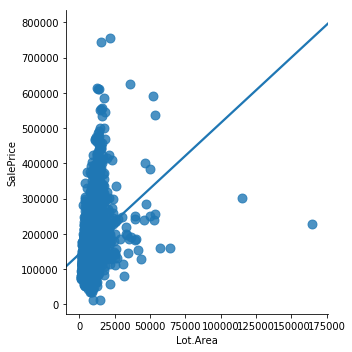

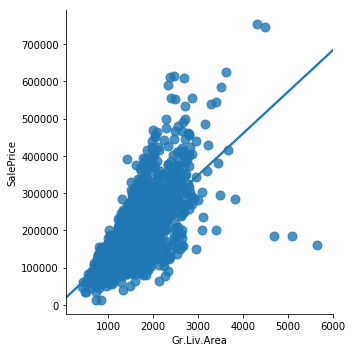

In [103]:
#Coparing Lot area and Sales price. Surprisingly as lot size increases Price Doesn't increase
pt1 = sns.lmplot(x='Lot.Area', y='SalePrice', data = dfA, order = 1, ci = None, scatter_kws = {'s': 80}) #Linear fit
#But size of the living are and price does seem to correlate positively
pt1 = sns.lmplot(x='Gr.Liv.Area', y='SalePrice', data = dfA, order = 1, ci = None, scatter_kws = {'s': 80}) #Linear fit


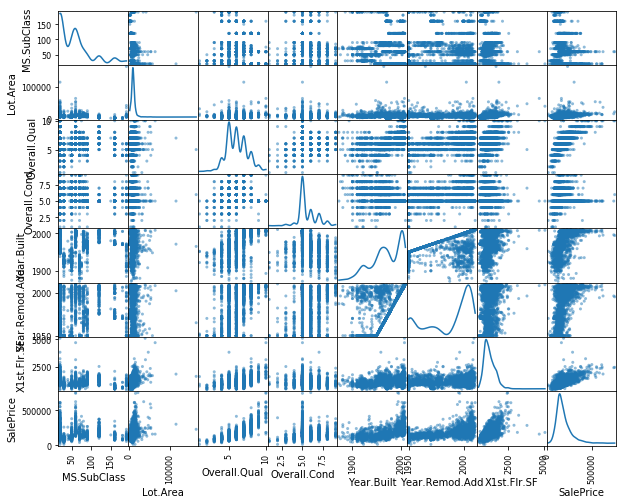

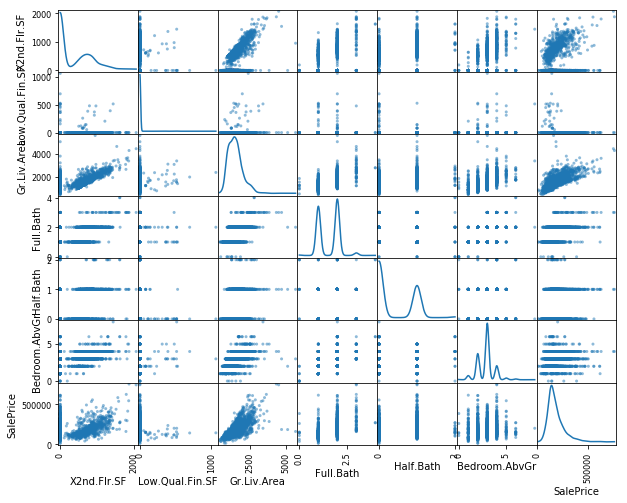

In [104]:
# Do a pairs plot to see portential relationships

plt.rcParams['figure.figsize'] = [10,8]
sm = pd.plotting.scatter_matrix(nums_dfA.iloc[:,[0,1,2,3,4,5,6,-1]], diagonal = "kde")
plt.show()

plt.rcParams['figure.figsize'] = [10,8]
sm = pd.plotting.scatter_matrix(nums_dfA.iloc[:,[7,8,9,10,11,12,-1]], diagonal = "kde")
plt.show()



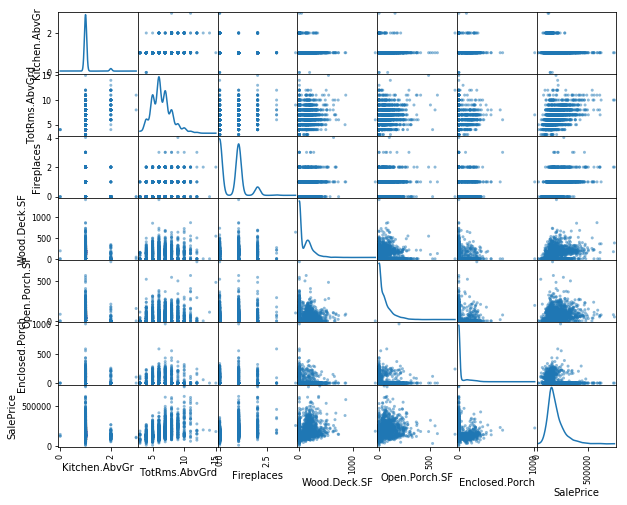

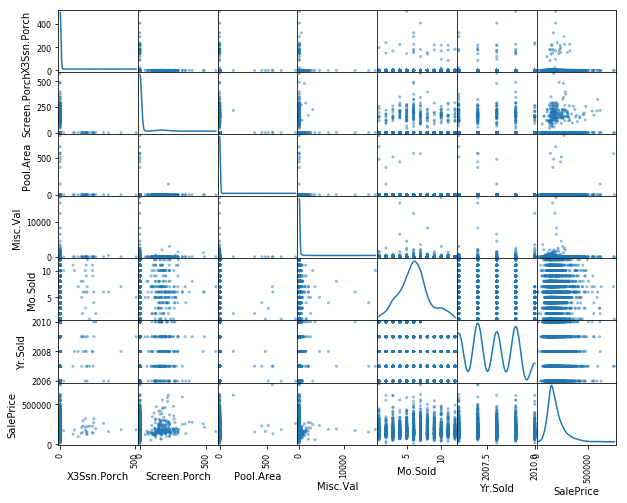

In [105]:
plt.rcParams['figure.figsize'] = [10,8]
sm = pd.plotting.scatter_matrix(nums_dfA.iloc[:,[13,14,15,16,17,18,-1]], diagonal = "kde")
plt.show()

plt.rcParams['figure.figsize'] = [10,8]
sm = pd.plotting.scatter_matrix(nums_dfA.iloc[:,[19,20,21,22,23,24,-1]], diagonal = "kde")
plt.show()

## II. Exploratory Analysis Questions
_Perform an exploratory analysis on your data by visualizing and/or applying other means of data exploration._<br/>
__1) What (if any) insights jump out at you?__ <br/>
Overall.Qual, Full.Bath, X1st.Flr,SF, X2nd.Flr,SF, GF.Lic.Area appear to have the strongest positive correlations with SalePrice.

__2) Do you have any hypotheses about relationship of certain variables to the price?__ <br/>
I think that as the size of a house increases, and the number of features the house has increases the price will increase. I don't think that things like what kind of drive way there is or if there is an ally way would have as big an impact.

## III. Model Building

In [106]:
#Testing Using All of the data

# Create training and test splits
data_x = dfA[list(dfA.drop(labels= 'SalePrice', axis=1))]
data_y = dfA['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 4)

#Create, fit, and evaluate linear model
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)
print_regression_error_metrics(y_test, preds)

Mean Squared Error, Median Absolute Error, R^2, Expected Variance Explained: 
[955329841.5758959, 13573.580717917997, 0.8271884805709656, 0.8289634884918398]


In [107]:
#Testing only using Only Numerical Data

# Create training and test splits
data_x = num_dfA[list(num_dfA)[:-1]]
data_y = num_dfA['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 4)

#Create, fit, and evaluate linear model
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)
print_regression_error_metrics(y_test, preds)


Mean Squared Error, Median Absolute Error, R^2, Expected Variance Explained: 
[1322065545.2325058, 17965.08393096365, 0.7160326426927157, 0.7167387252627402]


In [108]:
#Testing with only the data that appears to have strong correlations
# Create training and test splits
data_x = dfA[['Overall.Qual', 'Full.Bath','X1st.Flr.SF','X2nd.Flr.SF', 'Gr.Liv.Area']]
data_y = dfA['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 4)

#Create, fit, and evaluate linear model
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)
print_regression_error_metrics(y_test, preds)

Mean Squared Error, Median Absolute Error, R^2, Expected Variance Explained: 
[1514898041.7814662, 21842.846629527718, 0.6630999067104659, 0.6642647256161899]


In [109]:
#Testing with only the data that had strong correlations along with the numeric data
data_x = dfA[['Overall.Qual', 'Full.Bath','X1st.Flr.SF','X2nd.Flr.SF', 'Gr.Liv.Area'] + list(nums_dfA.drop(labels='SalePrice', axis=1))]
data_y = dfA['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 4)

#Create, fit, and evaluate linear model
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)
print_regression_error_metrics(y_test, preds)

Mean Squared Error, Median Absolute Error, R^2, Expected Variance Explained: 
[1322065545.232527, 17965.083930964116, 0.7160326426926988, 0.7167387252627235]


In [110]:
#Create a list of variables that have a correlation of  > 0.5 and < -0.5 compared to SalePrice
most_influencial = []
for i in range(len(list(dfA[:-1]))):
    if (dfA[list(dfA[:-1])[i]].corr(dfA['SalePrice']) > .5) or (dfA[list(dfA[:-1])[i]].corr(dfA['SalePrice']) < -.5):
        most_influencial.append(list(dfA[:-1])[i])
most_influencial.remove('SalePrice')

most_influencial

['Overall.Qual',
 'Year.Built',
 'Year.Remod.Add',
 'X1st.Flr.SF',
 'Gr.Liv.Area',
 'Full.Bath',
 'Exter.Qual_TA',
 'Foundation_PConc',
 'Kitchen.Qual_Ex',
 'Kitchen.Qual_TA']

In [111]:
#Testing using the most influencial variables
data_x = dfA[most_influencial]
data_y = dfA['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 4)

#Create, fit, and evaluate linear model
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)
print_regression_error_metrics(y_test, preds)

Mean Squared Error, Median Absolute Error, R^2, Expected Variance Explained: 
[1136942244.4490232, 17202.231591449818, 0.7605107027949589, 0.763070014265964]


In [129]:
#Create a list of variables that have a correlation of  > 0.45 and < -0.45 compared to SalePrice
more_influencial = []
for i in range(len(list(dfA[:-1]))):
    if (dfA[list(dfA[:-1])[i]].corr(dfA['SalePrice']) > .45) or (dfA[list(dfA[:-1])[i]].corr(dfA['SalePrice']) < -.45):
        more_influencial.append(list(dfA[:-1])[i])
more_influencial.remove('SalePrice')

#Testing using the most influencial variables
data_x = dfA[more_influencial]
data_y = dfA['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 4)

#Create, fit, and evaluate linear model
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)
print_regression_error_metrics(y_test, preds)

Mean Squared Error, Median Absolute Error, R^2, Expected Variance Explained: 
[1086472246.0289552, 17161.08993977192, 0.7731123449197331, 0.7755856423942722]


## III. Model Building
First construct a baseline model (containing all predictors) to predict the price. Then build the best model you can devise. In this part use ONLY dataset A and DO NOT TOUCH dataset B. You will want to split this into training and test sets and apply error metrics/compare models only on the test data.<br/>

__1) What approach did you use to arrive at the best model? Why did you select this approach?__<br/>
After creating the baseline model with all of the predictors I tried to identify which variables are most influencial. So on a wim I created a model with only the numerical data, not including the one-hot encoded variables. That model has an R^2 of 0.716 which told me that there were categorical variables that were more important in finding the sale price. So then I created a loop that would calculate the correlation between each of the columns and the sale price and only save the variable if it had a correlation greater than 0.45 or less than -0.45 and created a model using the resulting variables. I chose this method because I thought that it would be the best way to remove noise from the data and pick out the most influencial variables.

__2) Which error metric(s) are you using to compare performance? What is the value(s) of the error metric(s) for the baseline model and your best model?__ <br/>
I am using the R^2 and Expected Variance Explained metrics to compare performances. For the base model the R^2=0.827 and the EVE=0.829. However for my best model the R^2=0.773 and the EVE=0.775.

## IV Predicting and Validating

In [126]:
#Testing Using All of the data

# Create training and test splits
x_train = dfA.drop(labels= 'SalePrice', axis=1)
y_train = dfA['SalePrice']
x_test = dfB.drop(labels= 'SalePrice', axis=1)
y_test = dfB['SalePrice']

#Evaluate linear model using Test Data
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)
print_regression_error_metrics(y_test, preds)

Mean Squared Error, Median Absolute Error, R^2, Expected Variance Explained: 
[616380744.243704, 14068.10897229056, 0.887027236174042, 0.8880503032772105]


In [127]:
#Testing Using My Model

# Create training and test splits
x_train = dfA[more_influencial]
y_train = dfA['SalePrice']
x_test = dfB[more_influencial]
y_test = dfB['SalePrice']

#Evaluate linear model using Test Data
linear_mod = linear_model.LinearRegression()
linear_mod.fit(x_train, y_train)
preds = linear_mod.predict(x_test)
print_regression_error_metrics(y_test, preds)

Mean Squared Error, Median Absolute Error, R^2, Expected Variance Explained: 
[808334248.9163358, 16226.695507128024, 0.8299229964135468, 0.8299855912679001]


## IV Predicting and Validating
Run your baseline and best models on dataset B. DO NOT do any further training. Remember to apply all transforms you used in building the model to this set (use the transform function on the preprocessors you created in part I).<br/>

__1) What are the respective error metric values for each model on this set? How did your best model do on this data as compared to the baseline?__ <br/>
For the base model the R^2=0.887 and the EVE=0.888. However for my best model the R^2=0.8299 and the EVE=0.83. I found that my model got very close to the base model with significantly less variables. My model only used 14 variables while the base model had 1692 variables which resulted in an R^2 difference of about 0.05.

__2) Is your best model a good model? Why or why not__ <br/>
I consider my best model a good model. It selected the most significant factors which significantly reduced the chance of overfitting and it accounted for about 83% of the expected variation of the data.